<h1 align='center'> Градиентный спуск </h1>

## Теория градиентного спуска
[Cм. здесь](http://www.machinelearning.ru/wiki/index.php?title=Метод_градиентного_спуска)

## Пример кода градиентного спуска

[См.здесь](https://stackabuse.com/gradient-descent-in-python-implementation-and-theory/)

In [99]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D


#### Задаём функцию:

In [100]:
import sympy as sp
x1,y1 = sp.symbols('x1 y1')
func = 0.26 * (x1**2 + y1**2) - 0.48 * x1 * y1

sp.derive_by_array(func,[x1,y1])

[0.52*x1 - 0.48*y1, -0.48*x1 + 0.52*y1]

### Задание 1
##### Поиск экстремума функции многих переменной методом градиентного спуска с постоянным шагом;

In [101]:
def gradient_descent_fixed(w_init, obj_func,grad_func,learning_rate=0.05,
                     max_iterations = 500, threshold = 1e-2):
    
    w = w_init
    w_history = w
    f_history = obj_func(w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        
        delta_w = -learning_rate*grad_func(w) 
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
        print(f'X = {w_history[-1]}', f'Y = {f_history[-1]}', f'Iter = {i}', sep = '\n')
        print({'Значение':f_history[-1], 'Кол-во итераций':i})
    return w_history,f_history


In [102]:
def f(w):
    x,y = w[0],w[1]
    return 10*x**2 + y**2
    
def gradient_f(w):
    x,y = w[0],w[1]
    return np.array([20*x,2*y])

In [103]:
w_hist,f_hist = gradient_descent_fixed(w_init = np.array([1,1]), obj_func = f,grad_func = gradient_f , learning_rate=0.05)

X = [0.  0.9]
Y = [0.81]
Iter = 1
{'Значение': array([0.81]), 'Кол-во итераций': 1}
X = [0.   0.81]
Y = [0.6561]
Iter = 2
{'Значение': array([0.6561]), 'Кол-во итераций': 2}
X = [0.    0.729]
Y = [0.531441]
Iter = 3
{'Значение': array([0.531441]), 'Кол-во итераций': 3}
X = [0.     0.6561]
Y = [0.43046721]
Iter = 4
{'Значение': array([0.43046721]), 'Кол-во итераций': 4}
X = [0.      0.59049]
Y = [0.34867844]
Iter = 5
{'Значение': array([0.34867844]), 'Кол-во итераций': 5}
X = [0.       0.531441]
Y = [0.28242954]
Iter = 6
{'Значение': array([0.28242954]), 'Кол-во итераций': 6}
X = [0.        0.4782969]
Y = [0.22876792]
Iter = 7
{'Значение': array([0.22876792]), 'Кол-во итераций': 7}
X = [0.         0.43046721]
Y = [0.18530202]
Iter = 8
{'Значение': array([0.18530202]), 'Кол-во итераций': 8}
X = [0.         0.38742049]
Y = [0.15009464]
Iter = 9
{'Значение': array([0.15009464]), 'Кол-во итераций': 9}
X = [0.         0.34867844]
Y = [0.12157665]
Iter = 10
{'Значение': array([0.12157665]), '

##### Результат работы алгоритма

In [104]:
 print(f'X = {w_hist[-1]}', f'Y = {f_hist[-1]}', sep = '\n')

X = [0.         0.20589113]
Y = [0.04239116]


### Визуализация

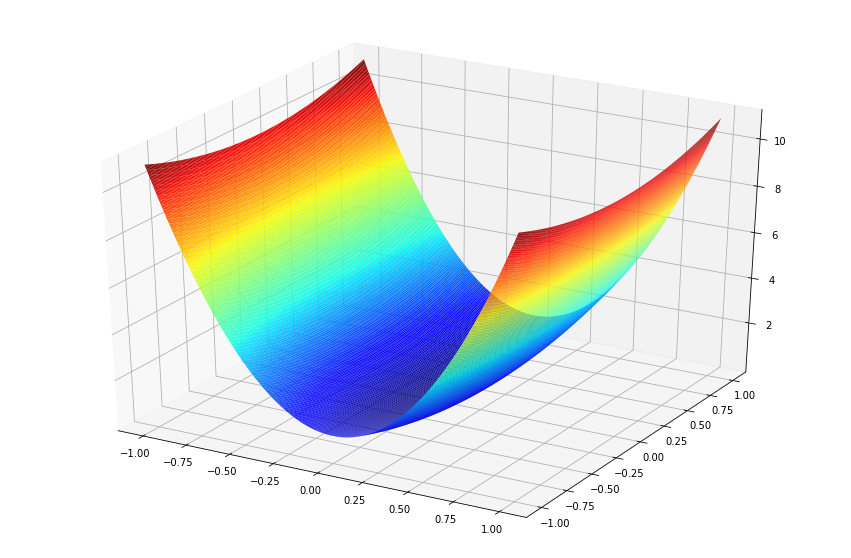

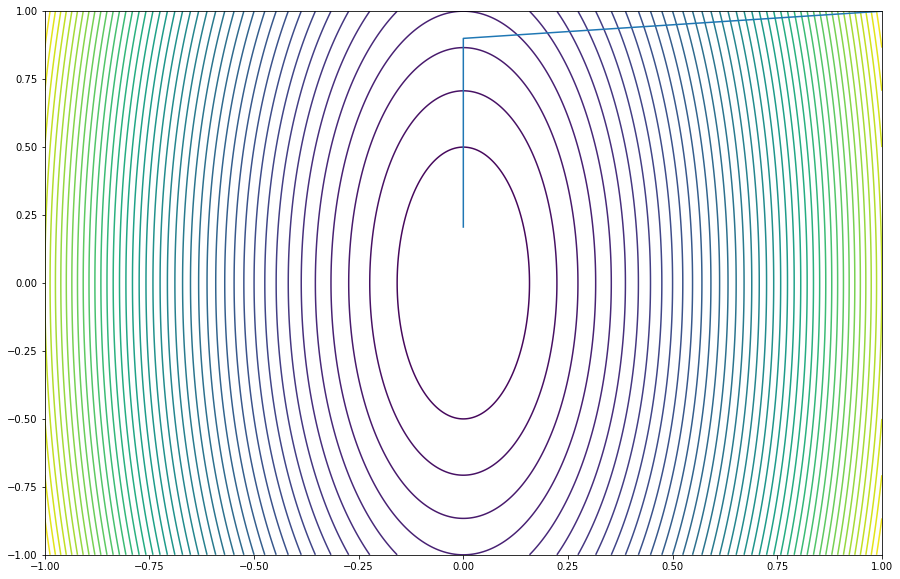

In [105]:

x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, rstride=5, cstride=5,cmap='jet')

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.contour(X,Y,Z, levels=50)
  
ax.plot(w_hist[:,0],w_hist[:,1])

### Дополнительно:

###### Функция, определяющая длину оптимального шага градиентного спуска на основе градиента и Гессиниана
 

In [106]:
def optimize_learning_rate(hessian_matrix):
    L,l = np.linalg.eigvals(hessian_matrix).min(),np.linalg.eigvals(hessian_matrix).max()
    return 2 / (L+l)

###### реализации алгоритма градиентного спуска ,где каждый раз выбираем оптимальный шаг на основе функции выше


In [107]:
def gradient_descent(w_init, obj_func,grad_func,hessian_func,
                    max_iterations = 500, threshold = 1e-2):
    
    w = w_init
    w_history = w
    f_history = obj_func(w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        learning_rate = optimize_learning_rate(hessian_func(w))
        
        delta_w = -learning_rate*grad_func(w) 
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
        print(f'X = {w_history[-1]}', f'Y = {f_history[-1]}', f'Iter = {i}', sep = '\n')
        print({'Значение':f_history[-1], 'Кол-во итераций':i})
    return w_history,f_history

    
    

In [108]:
def f(w):
    x,y = w[0],w[1]
    return 10*x**2 + y**2
    
def gradient_f(w):
    x,y = w[0],w[1]
    return np.array([20*x,2*y])
  
def hessian_f(w):
    x,y = w[0],w[1]
    return np.array([[20,0],[0,2]])
    
    

In [109]:
w_hist,f_hist = gradient_descent(w_init = np.array([1,1]), obj_func = f,grad_func = gradient_f ,hessian_func = hessian_f)

X = [-0.81818182  0.81818182]
Y = [7.36363636]
Iter = 1
{'Значение': array([7.36363636]), 'Кол-во итераций': 1}
X = [0.66942149 0.66942149]
Y = [4.92937641]
Iter = 2
{'Значение': array([4.92937641]), 'Кол-во итераций': 2}
X = [-0.54770849  0.54770849]
Y = [3.29983049]
Iter = 3
{'Значение': array([3.29983049]), 'Кол-во итераций': 3}
X = [0.44812513 0.44812513]
Y = [2.20897743]
Iter = 4
{'Значение': array([2.20897743]), 'Кол-во итераций': 4}
X = [-0.36664783  0.36664783]
Y = [1.47873696]
Iter = 5
{'Значение': array([1.47873696]), 'Кол-во итераций': 5}
X = [0.29998459 0.29998459]
Y = [0.9898983]
Iter = 6
{'Значение': array([0.9898983]), 'Кол-во итераций': 6}
X = [-0.24544194  0.24544194]
Y = [0.66265919]
Iter = 7
{'Значение': array([0.66265919]), 'Кол-во итераций': 7}
X = [0.20081613 0.20081613]
Y = [0.4435983]
Iter = 8
{'Значение': array([0.4435983]), 'Кол-во итераций': 8}
X = [-0.16430411  0.16430411]
Y = [0.29695423]
Iter = 9
{'Значение': array([0.29695423]), 'Кол-во итераций': 9}
X = 

##### Результат работы алгоритма

In [110]:
 print(f'X = {w_hist[-1]}', f'Y = {f_hist[-1]}', sep = '\n')

X = [0.04032712 0.04032712]
Y = [0.01788904]


### Визуализация

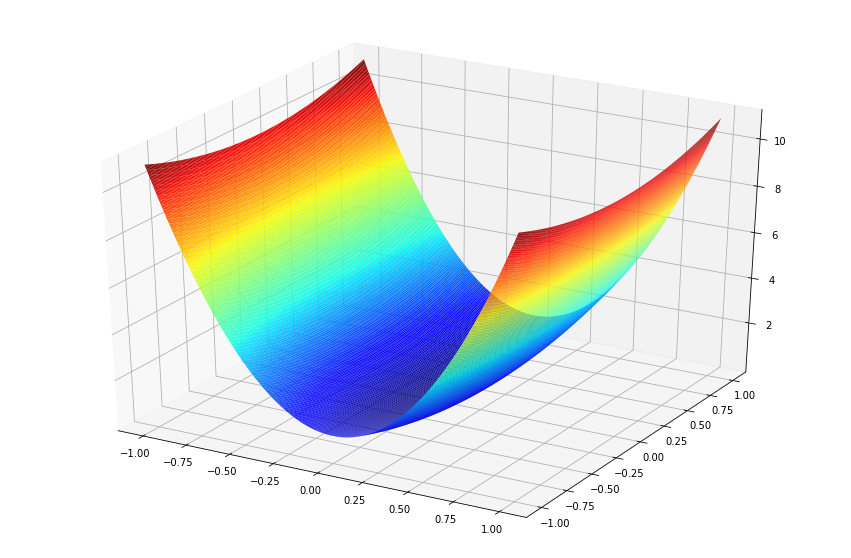

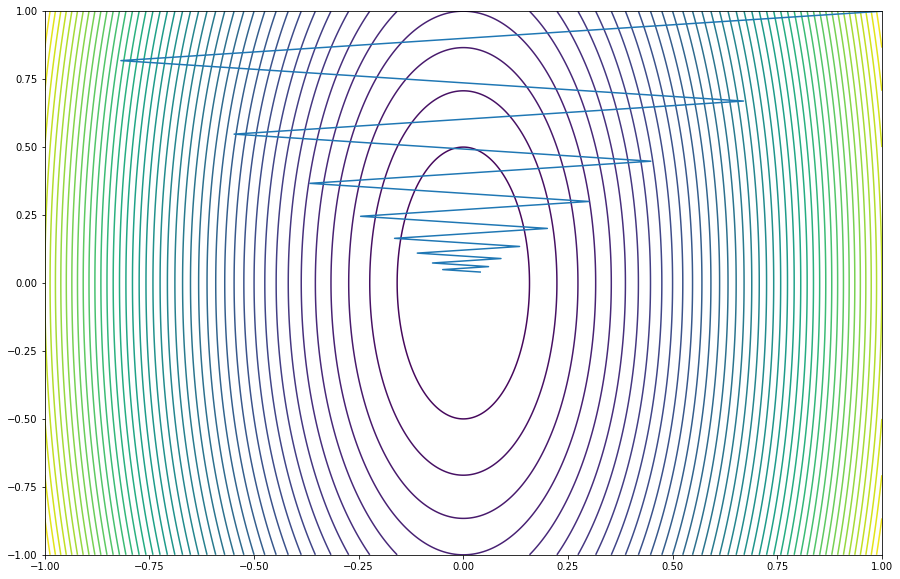

In [111]:
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, rstride=5, cstride=5,cmap='jet')

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.contour(X,Y,Z, levels=50)
  
ax.plot(w_hist[:,0],w_hist[:,1])



### Задание 2
Написать функцию, реализующую алгоритм градиентного спуска с переменным шагом

In [112]:
def gradient_descent_change_step(w_init, obj_func,grad_func,hessian_func,
                    learning_rate = 0.01,eps = 0.1,change_coef = 0.1,max_iterations = 5000, threshold = 1e-6):
    
    w = w_init
    w_history = w
    f_history = obj_func(w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        if obj_func(w - learning_rate*grad_func(w)) > obj_func(w) - eps*learning_rate*np.linalg.norm(grad_func(w)):
            learning_rate*=change_coef
        
        delta_w = -learning_rate*grad_func(w) 
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
        print(f'X = {w_history[-1]}', f'Y = {f_history[-1]}', f'Iter = {i}', sep = '\n')
        print({'Значение':f_history[-1], 'Кол-во итераций':i})
    return w_history,f_history


In [113]:
w_hist,f_hist = gradient_descent_change_step(w_init = np.array([1,1]), obj_func = f,grad_func = gradient_f ,hessian_func = hessian_f)


X = [0.8  0.98]
Y = [7.3604]
Iter = 1
{'Значение': array([7.3604]), 'Кол-во итераций': 1}
X = [0.64   0.9604]
Y = [5.01836816]
Iter = 2
{'Значение': array([5.01836816]), 'Кол-во итераций': 2}
X = [0.512    0.941192]
Y = [3.50728238]
Iter = 3
{'Значение': array([3.50728238]), 'Кол-во итераций': 3}
X = [0.4096     0.92236816]
Y = [2.52848462]
Iter = 4
{'Значение': array([2.52848462]), 'Кол-во итераций': 4}
X = [0.32768   0.9039208]
Y = [1.89081463]
Iter = 5
{'Значение': array([1.89081463]), 'Кол-во итераций': 5}
X = [0.262144   0.88584238]
Y = [1.47191149]
Iter = 6
{'Значение': array([1.47191149]), 'Кол-во итераций': 6}
X = [0.2097152  0.86812553]
Y = [1.19344659]
Iter = 7
{'Значение': array([1.19344659]), 'Кол-во итераций': 7}
X = [0.16777216 0.85076302]
Y = [1.0052727]
Iter = 8
{'Значение': array([1.0052727]), 'Кол-во итераций': 8}
X = [0.13421773 0.83374776]
Y = [0.87527932]
Iter = 9
{'Значение': array([0.87527932]), 'Кол-во итераций': 9}
X = [0.10737418 0.81707281]
Y = [0.78290012]
I

##### Результат работы алгоритма

In [114]:
 print(f'X = {w_hist[-1]}', f'Y = {f_hist[-1]}', sep = '\n')

X = [4.26704127e-15 4.99762838e-02]
Y = [0.00249763]


### Визуализация

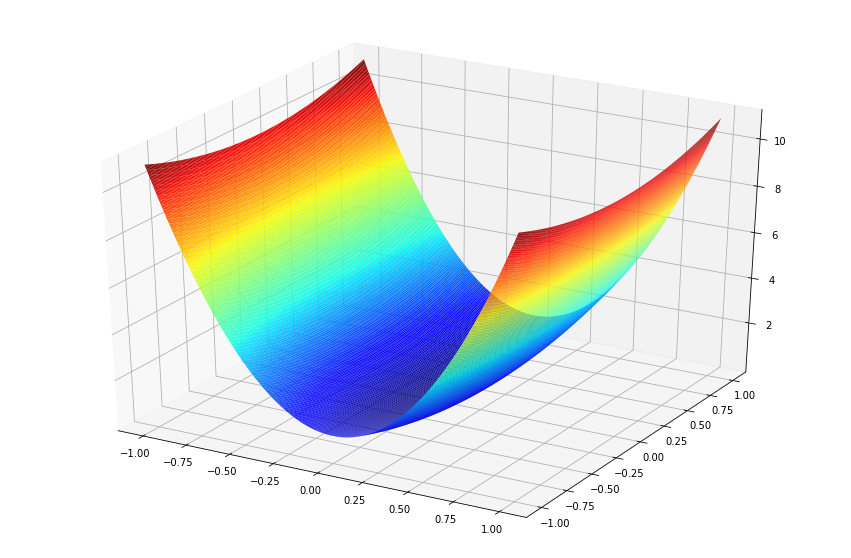

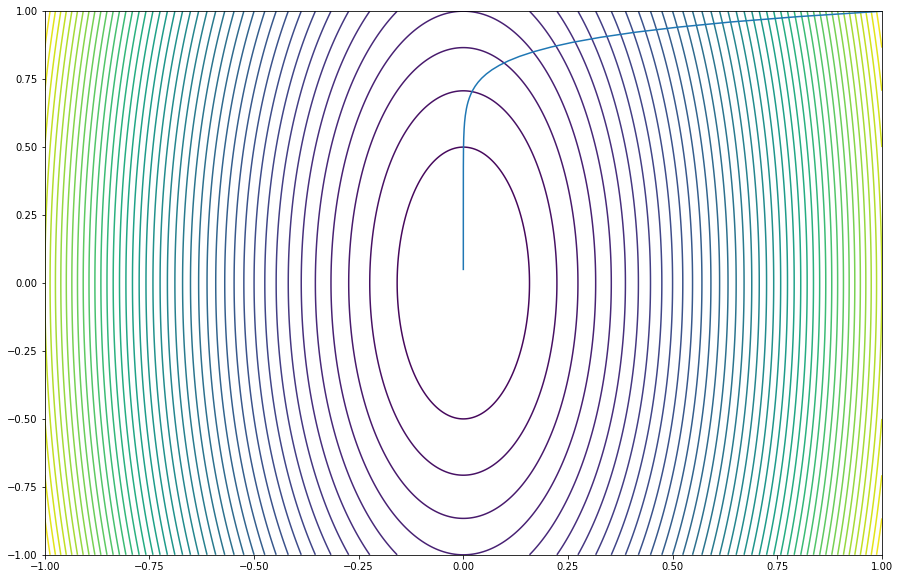

In [115]:
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, rstride=5, cstride=5,cmap='jet')

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.contour(X,Y,Z, levels=50)
  
ax.plot(w_hist[:,0],w_hist[:,1])


### Задание 3
Написать функцию, реализующую метод наискорейшего спуска, используя в качестве метода одномерной оптимизации метод Брента.

In [116]:
def fastest_learning_rate(w,obj_func,grad_func):
    
    opt_learn_rates = minimize_scalar(lambda l: f(w - l*grad_func(w)), method='brent')
    return opt_learn_rates.x

In [117]:
def gradient_descent_fastest(w_init, obj_func,grad_func,hessian_func,
                    max_iterations = 5000, threshold = 1e-6):
    
    w = w_init
    w_history = w
    f_history = obj_func(w)
    delta_w = np.zeros(w.shape)
    i = 0
    diff = 1.0e10
    
    while  i<max_iterations and diff>threshold:
        learning_rate = fastest_learning_rate(w,obj_func,grad_func)
        
        delta_w = -learning_rate*grad_func(w) 
        w = w+delta_w
        
        # store the history of w and f
        w_history = np.vstack((w_history,w))
        f_history = np.vstack((f_history,obj_func(w)))
        
        # update iteration number and diff between successive values
        # of objective function
        i+=1
        diff = np.absolute(f_history[-1]-f_history[-2])
        print(f'X = {w_history[-1]}', f'Y = {f_history[-1]}', f'Iter = {i}', sep = '\n')
        print({'Значение':f_history[-1], 'Кол-во итераций':i})
    return w_history,f_history


In [118]:
w_hist,f_hist = gradient_descent_fastest(w_init = np.array([1,1]), obj_func = f,grad_func = gradient_f ,hessian_func = hessian_f)


X = [-0.00899101  0.8991009 ]
Y = [0.80919081]
Iter = 1
{'Значение': array([0.80919081]), 'Кол-во итераций': 1}
X = [0.0735628 0.0735628]
Y = [0.05952634]
Iter = 2
{'Значение': array([0.05952634]), 'Кол-во итераций': 2}
X = [-0.0006614   0.06614038]
Y = [0.00437892]
Iter = 3
{'Значение': array([0.00437892]), 'Кол-во итераций': 3}
X = [0.00541149 0.00541149]
Y = [0.00032213]
Iter = 4
{'Значение': array([0.00032213]), 'Кол-во итераций': 4}
X = [-4.86547163e-05  4.86547163e-03]
Y = [2.3696487e-05]
Iter = 5
{'Значение': array([2.3696487e-05]), 'Кол-во итераций': 5}
X = [0.00039808 0.00039808]
Y = [1.74317995e-06]
Iter = 6
{'Значение': array([1.74317995e-06]), 'Кол-во итераций': 6}
X = [-3.5791772e-06  3.5791772e-04]
Y = [1.282332e-07]
Iter = 7
{'Значение': array([1.282332e-07]), 'Кол-во итераций': 7}
X = [2.92841771e-05 2.92841771e-05]
Y = [9.43319333e-09]
Iter = 8
{'Значение': array([9.43319333e-09]), 'Кол-во итераций': 8}


##### Результат работы алгоритма

In [119]:
 print(f'X = {w_hist[-1]}', f'Y = {f_hist[-1]}', sep = '\n')

X = [2.92841771e-05 2.92841771e-05]
Y = [9.43319333e-09]


### Визуализация

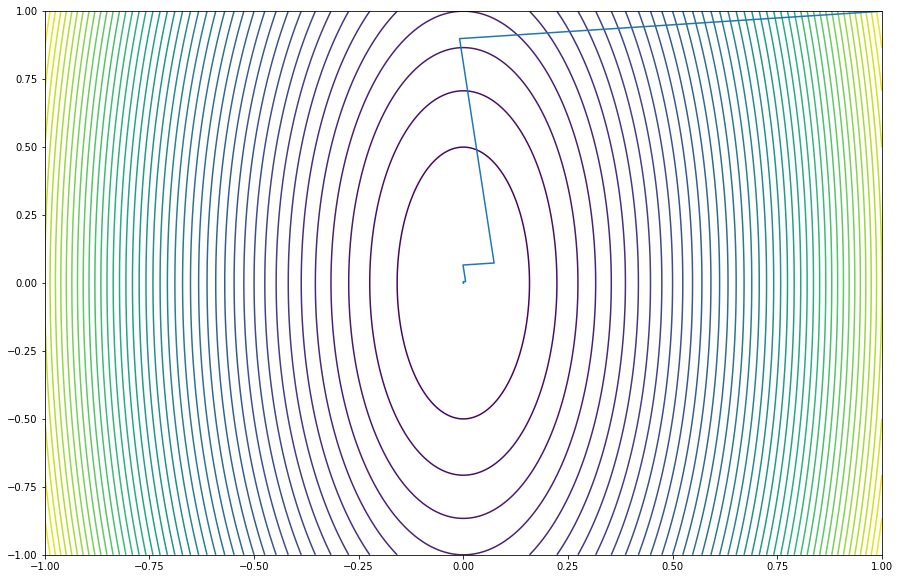

In [120]:
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
Z = f([X,Y])

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.contour(X,Y,Z, levels=50)
  
ax.plot(w_hist[:,0],w_hist[:,1])
